In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Load data

In [2]:
data_path = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/data/'
train = pd.read_csv(f'{data_path}train.csv')
test = pd.read_csv(f'{data_path}test.csv')
wp1 = pd.read_csv(f'{data_path}wp1.csv')
wp2 = pd.read_csv(f'{data_path}wp2.csv')
wp3 = pd.read_csv(f'{data_path}wp3.csv')
wp4 = pd.read_csv(f'{data_path}wp4.csv')
wp5 = pd.read_csv(f'{data_path}wp5.csv')
wp6 = pd.read_csv(f'{data_path}wp6.csv')


In [3]:
def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

for df in [train,test,wp1,wp2,wp3,wp4,wp5,wp6]:
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')
    print("NaN in Dataset: ",get_df_name(df), df.isnull().values.any())


NaN in Dataset:  train False
NaN in Dataset:  test False
NaN in Dataset:  wp1 True
NaN in Dataset:  wp2 True
NaN in Dataset:  wp3 True
NaN in Dataset:  wp4 True
NaN in Dataset:  wp5 True
NaN in Dataset:  wp6 True


In [4]:
train['train'] = 1
train = train.reset_index()
test = test.reset_index()
data_full = train.append(test)
data_full = data_full.sort_values(by='date')

In [5]:
def process_wp_file(wp):
    wp['contain_na'] = wp1['u'].isna()
    wp['date_f'] = wp['date']+pd.to_timedelta(wp['hors']-1, unit='h')
    wp = wp.sort_values(by=['contain_na','date_f', 'date'], ascending=(True, True, False), na_position='last')
    wp.drop_duplicates(subset=['date_f'],keep='first',inplace=True)
    wp['date']=wp['date_f']
    wp=wp.drop(columns=['date_f','hors','contain_na'])
    return wp


In [6]:
wp1 = process_wp_file(wp1)
wp1 = pd.merge(data_full, wp1, on=['date'], how='left').drop(
    columns=['wp2', 'wp3', 'wp4', 'wp5', 'wp6'])
wp2 = process_wp_file(wp2)
wp2 = pd.merge(data_full, wp2, on=['date'], how='left').drop(
    columns=['wp1', 'wp3', 'wp4', 'wp5', 'wp6'])
wp3 = process_wp_file(wp3)
wp3 = pd.merge(data_full, wp3, on=['date'], how='left').drop(
    columns=['wp2', 'wp1', 'wp4', 'wp5', 'wp6'])
wp4 = process_wp_file(wp4)
wp4 = pd.merge(data_full, wp4, on=['date'], how='left').drop(
    columns=['wp2', 'wp3', 'wp1', 'wp5', 'wp6'])
wp5 = process_wp_file(wp5)
wp5 = pd.merge(data_full, wp5, on=['date'], how='left').drop(
    columns=['wp2', 'wp3', 'wp4', 'wp1', 'wp6'])
wp6 = process_wp_file(wp6)
wp6 = pd.merge(data_full, wp6, on=['date'], how='left').drop(
    columns=['wp2', 'wp3', 'wp4', 'wp5', 'wp1'])


In [212]:
# from impyte import impyte
# wp3['date']=wp3['date'].astype(str)
# imp = impyte.Impyter(wp3)
# imp.impute(estimator='rf', multi_nans=True)


Computing NaN-patterns first ...

Scoring Threshold             Classification                Regression                    
                              None                          None                          

Pattern: Label                Score                         Estimator                     

Multi nans
1: wp3                        -0.352 (r2)                   RandomForestRegressor           imputed...
1: train                      1.000 (f1_macro)              RandomForestClassifier          imputed...
1: u                          -0.725 (r2)                   RandomForestRegressor           imputed...
1: v                          -0.705 (r2)                   RandomForestRegressor           imputed...
1: ws                         -0.631 (r2)                   RandomForestRegressor           imputed...
1: wd                         -1.181 (r2)                   RandomForestRegressor           imputed...
2: wp3                        0.454 (r2)                    Ra

,index,date,wp3,train,u,v,ws,wd
0,0,2009-07-01 00:00:00,0.233,1.0,3.3200,-1.9300,3.8400,120.2000
1,1,2009-07-01 01:00:00,0.249,1.0,2.8800,-1.7800,3.3900,121.7600
2,2,2009-07-01 02:00:00,0.175,1.0,2.4600,-1.7100,2.9900,124.8500
3,3,2009-07-01 03:00:00,0.085,1.0,2.0700,-1.6800,2.6700,129.0900
4,4,2009-07-01 04:00:00,0.032,1.0,1.7700,-1.6500,2.4200,132.9600
...,...,...,...,...,...,...,...,...
26564,19028,2012-07-11 20:00:00,0.037,1.0,4.0023,-3.3242,5.8926,128.6878
26565,19029,2012-07-11 21:00:00,0.026,1.0,4.0093,-3.3235,5.8968,128.5760
26566,19030,2012-07-11 22:00:00,0.032,1.0,4.0093,-3.3235,5.8968,128.5760
26567,19031,2012-07-11 23:00:00,0.058,1.0,3.9998,-3.2558,5.9297,128.7028


In [7]:
def mask_na(wp,option=1):
    if option ==1:
        wp=wp.fillna(method='ffill')
    elif option ==2:
        wp.interpolate()
    else:
        from impyte import impyte
        wp['date'] = wp['date'].astype(str)
        imp = impyte.Impyter(wp)
        wp= imp.impute(estimator='rf', multi_nans=True)
        wp['date'] = pd.to_datetime(wp['date'], format='%Y%m%d%H')
        
    return wp

for wp in [wp1,wp2,wp3,wp4,wp5,wp6]:
    wp=mask_na(wp, option=1)

In [8]:
save_address = 'C:/Users/xi-lucy.chen/Documents/GitLab/data_challenge_alc_total/phase 2 model/Lucy/data/'
wp1.to_csv(save_address+'full_data.wp1', index=False)
wp2.to_csv(save_address+'full_data.wp2', index=False)
wp3.to_csv(save_address+'full_data.wp3', index=False)
wp4.to_csv(save_address+'full_data.wp4', index=False)
wp5.to_csv(save_address+'full_data.wp5', index=False)
wp6.to_csv(save_address+'full_data.wp6', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\xi-lucy.chen/data/full_data.wp1'

# Feature Engineering

In [101]:
def get_X(df):
    return df.iloc[:,2:]
def get_X_test(df):
    return df.iloc[:,1:]

In [102]:
def get_y(df):
   return df['wp1']

In [103]:
#MInmax Scaler: This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian. This Scaler is sensitive to outliers.
#Standar Scaler: The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1.

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def scale_features(df,scaler='StandardScaler'):
    if scaler == "MinMaxScaler":
        scaler = MinMaxScaler(feature_range =(0, 1))
    else:
        scaler = "StandardScaler"
        scaler = StandardScaler(feature_range =(0, 1))

    df[['u','v','ws','wd']] = scaler.fit_transform(df[['u','v','ws','wd']])
    
    return df

In [ ]:
from tsfresh.feature_extraction import extract_features, ComprehensiveFCParameters

def add_ts_features(df):
    extraction_settings = ComprehensiveFCParameters()

    X = extract_features(df, column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function=impute)


In [104]:
def add_features(df):
    wv = df['ws']
    wd_rad = df['wd']*np.pi / 180

    # Calculate the wind x and y components.
    df['Wx'] = wv*np.cos(wd_rad)
    df['Wy'] = wv*np.sin(wd_rad)
    return df

def add_features2(df):
    #df['year']=pd.DatetimeIndex(df['date']).year
    #df['month']=pd.DatetimeIndex(df['date']).month
    # df['day']=pd.DatetimeIndex(df['date']).day
    # df['hour']=pd.DatetimeIndex(df['date']).hour
    # df['dayofweek_num']=pd.DatetimeIndex(df['date']).dayofweek  
    hour = 60*60
    day = 24*60*60
    month = (30)*day
    year = (365.2425)*day
    
    date_time = pd.DatetimeIndex(df['date'])
    timestamp_s = date_time.map(datetime.datetime.timestamp)

    #df['Hour sin'] = np.sin( timestamp_s* (2 * np.pi / hour))
    #df['Hour cos'] = np.cos( timestamp_s * (2 * np.pi / hour))
    df['Day sin'] = np.sin( timestamp_s* (2 * np.pi / day))
    df['Day cos'] = np.cos( timestamp_s * (2 * np.pi / day))
    #df['Month sin'] = np.sin( timestamp_s* (2 * np.pi / month))
    #df['Month cos'] = np.cos( timestamp_s * (2 * np.pi / month))
    df['Year sin'] = np.sin( timestamp_s * (2 * np.pi / year))
    df['Year cos'] = np.cos( timestamp_s * (2 * np.pi / year))

    return df
def add_features3(data):
    #data[['u','v','ws','wd']] = np.abs(data[['u','v','ws','wd']])
    data.index=data['date']
    data['lag_1_u'] = data['u'].shift(1)
    data['lag_1_v'] = data['v'].shift(1)
    data['lag_1_ws'] = data['ws'].shift(1)
    data['lag_-1_u'] = data['u'].shift(-1)
    data['lag_-1_v'] = data['v'].shift(-1)
    data['lag_-1_ws'] = data['ws'].shift(-1)

    # data['lag_1_Wx'] = data['Wx'].shift(1)
    # data['lag_1_Wy'] = data['Wy'].shift(1)
    # data['lag_-1_Wx'] = data['Wx'].shift(-1)
    # data['lag_-1_Wy'] = data['Wy'].shift(-1)
    #data['lag_1_wd'] = data['wd'].shift(1)
    #data['lag_-1_wd'] = data['wd'].shift(-1)

    data['expanding_mean_u'] = data['u'].expanding(1,center=True).mean()#,center=True
    data['expanding_mean_v'] = data['v'].expanding(1,center=True).mean()
    data['expanding_mean_ws'] = data['ws'].expanding(1,center=True).mean()
    #data['expanding_mean_Wx'] = data['Wx'].expanding(1,center=True).mean()
    #data['expanding_mean_Wy'] = data['Wy'].expanding(1,center=True).mean()
    #data['expanding_mean_wd'] = data['wd'].expanding(2).mean()
    
    # data['rolling_mean_ws'] = data['ws'].rolling(window=2,closed='both').mean()
    # data['rolling_mean_wd'] = data['wd'].rolling(window=2,closed='both').mean()
    # data['rolling_mean_v'] = data['v'].rolling(window=2,closed='both').mean()
    # data['rolling_mean_u'] = data['u'].rolling(window=2,closed='both').mean()
    
    
    # data['lag_2_u'] = data['u'].shift(2)
    # data['lag_2_v'] = data['v'].shift(2)
    # data['lag_2_ws'] = data['ws'].shift(2)
    # data['lag_-2_u'] = data['u'].shift(-2)
    # data['lag_-2_v'] = data['v'].shift(-2)
    # data['lag_-2_ws'] = data['ws'].shift(-2)
    
    # data['rolling_mean_u_1'] = data['u'].rolling(2,closed='both').mean()
    # data['rolling_mean_v_1'] = data['v'].rolling(2,closed='both').mean()
    # data['rolling_mean_ws_1'] = data['ws'].rolling(2,closed='both').mean()
    # data['rolling_mean_wd_1'] = data['wd'].rolling(2,closed='both').mean()

    return data


In [105]:
def add_features4(df):
    """Adds Features to DataFrame and Takes Averages for Dates Before train_end_str"""    

    df['Is_day_part1'] = (pd.DatetimeIndex(df['date']).hour.isin([1,2,3,4,5,6])) *1
    df['Is_day_part2'] = (pd.DatetimeIndex(df['date']).hour.isin([7,8,9,10,11,12])) *1
    df['Is_day_part3'] = (pd.DatetimeIndex(df['date']).hour.isin([13,14,15,16,17,18])) *1
    df['Is_day_part4'] = (pd.DatetimeIndex(df['date']).hour.isin([19,20,21,22,23,24])) *1
    #df['Is_wknd'] = pd.DatetimeIndex(df['date']).dayofweek // 4 # Fri-Sun are 4-6, Monday is 0 so this is valid
    
    #df['Month'] = pd.DatetimeIndex(df['date']).month    

    return df

In [106]:
def add_all_features(df):
    #df=scale_features(df)
    #df=add_features(df)
    df=add_features2(df)  
    df=add_features3(df)
    #df=add_features4(df)
    return df

In [107]:
data['train'] = 1
data=data.reset_index()
test=test.reset_index()
data_full=data.append(test)
data_full=data_full.sort_values(by='date')

In [108]:
data_full=add_all_features(data_full)

In [109]:
# resplit data & test
data=data_full[data_full['train']==1].sort_values(by='index')
test=data_full[data_full['train']!=1].sort_values(by='index')
data=data.drop(columns=['train','index'])
test=test.drop(columns=['train','index','wp1'])

In [110]:
X=get_X(data)
y=get_y(data)
X_forecast=get_X_test(test)

# Data Split

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
def split_data(df):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=177)
    return X_train, X_test, y_train, y_test

In [113]:
X_train, X_test, y_train, y_test = split_data(data)

# XGBOOST

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
plt.style.use('fivethirtyeight')

In [115]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [116]:
import numpy as np
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 0.20


https://xgboost.readthedocs.io/en/latest/parameter.html

In [117]:
params=  {'colsample_bytree': 0.6,
 'max_depth': 9,
 'min_child_weight': 5,
 'eval_metric': 'mae',
 'subsample': 0.6,
 'colsample': 1.0,
 'eta': 0.05}

num_boost_round = 1000


In [118]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best MAE: {:.5f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))


[132]	Test-mae:0.07364
[133]	Test-mae:0.07352
[134]	Test-mae:0.07345
[135]	Test-mae:0.07329
[136]	Test-mae:0.07319
[137]	Test-mae:0.07304
[138]	Test-mae:0.07297
[139]	Test-mae:0.07282
[140]	Test-mae:0.07279
[141]	Test-mae:0.07272
[142]	Test-mae:0.07266
[143]	Test-mae:0.07252
[144]	Test-mae:0.07237
[145]	Test-mae:0.07228
[146]	Test-mae:0.07220
[147]	Test-mae:0.07209
[148]	Test-mae:0.07201
[149]	Test-mae:0.07200
[150]	Test-mae:0.07194
[151]	Test-mae:0.07182
[152]	Test-mae:0.07175
[153]	Test-mae:0.07169
[154]	Test-mae:0.07166
[155]	Test-mae:0.07156
[156]	Test-mae:0.07145
[157]	Test-mae:0.07139
[158]	Test-mae:0.07130
[159]	Test-mae:0.07121
[160]	Test-mae:0.07115
[161]	Test-mae:0.07102
[162]	Test-mae:0.07096
[163]	Test-mae:0.07091
[164]	Test-mae:0.07088
[165]	Test-mae:0.07083
[166]	Test-mae:0.07077
[167]	Test-mae:0.07071
[168]	Test-mae:0.07069
[169]	Test-mae:0.07059
[170]	Test-mae:0.07055
[171]	Test-mae:0.07044
[172]	Test-mae:0.07037
[173]	Test-mae:0.07026
[174]	Test-mae:0.07015
[175]	Test

In [119]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=30
)

cv_results['test-mae-mean'].min()

[15:17:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:17:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:17:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample } might not be used.

  This may not be accurate due to some parameters are only used in language bi

0.061494599999999996

## TUNING

In [120]:
tune_parameter=False
grid_search=False

In [121]:
#for tuning parameters
if grid_search:
    parameters_for_testing = {
    'learning_rate':[0.08,0.07,0.09],
    'max_depth':[3,5],
    }

    xgb_model = xgb.XGBRegressor()

    gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, cv=5, n_jobs=4, verbose=2,scoring='neg_mean_absolute_error')
    gsearch1.fit(X_train,y_train)
    print (gsearch1.scorer_)
    print('best params')
    print (gsearch1.best_params_)
    print('best score')
    print (gsearch1.best_score_)

In [122]:
if tune_parameter:
    gridsearch_params = [
        (max_depth, min_child_weight)
        for max_depth in range(9,14)
        for min_child_weight in range(5,10)
    ]

    min_mae = float("Inf")
    best_params = None
    for max_depth, min_child_weight in gridsearch_params:
        print("CV with max_depth={}, min_child_weight={}".format(
                                max_depth,
                                min_child_weight))
        # Update our parameters
        params['max_depth'] = max_depth
        params['min_child_weight'] = min_child_weight
        # Run CV
        cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics={'mae'},
            early_stopping_rounds=10
        )
        # Update best MAE
        mean_mae = cv_results['test-mae-mean'].min()
        boost_rounds = cv_results['test-mae-mean'].argmin()
        print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
        if mean_mae < min_mae:
            min_mae = mean_mae
            best_params = (max_depth,min_child_weight)
    print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
    
    params['max_depth']=best_params[0]
    params['min_child_weight']=best_params[1]

In [123]:
if tune_parameter:
    gridsearch_params = [
        (subsample, colsample)
        for subsample in [i/10. for i in range(6,11)]
        for colsample in [i/10. for i in range(6,11)]
    ]

    min_mae = float("Inf")
    best_params = None
    # We start by the largest values and go down to the smallest
    for subsample, colsample in reversed(gridsearch_params):
        print("CV with subsample={}, colsample={}".format(
                                subsample,
                                colsample))
        # We update our parameters
        params['subsample'] = subsample
        params['colsample_bytree'] = colsample
        # Run CV
        cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics={'mae'},
            early_stopping_rounds=10
        )
        # Update best score
        mean_mae = cv_results['test-mae-mean'].min()
        boost_rounds = cv_results['test-mae-mean'].argmin()
        print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
        if mean_mae < min_mae:
            min_mae = mean_mae
            best_params = (subsample,colsample)
    print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
    params['subsample']=best_params[0]
    params['colsample']=best_params[1]

In [124]:
if tune_parameter:
    %time
    # This can take some time…
    min_mae = float("Inf")
    best_params = None
    for eta in [.5, .3, .1,0.05,0.01]:  #alias: learning_rate
        print("CV with eta={}".format(eta))
        # We update our parameters
        params['eta'] = eta
        # Run and time CV
        %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42, nfold=5,metrics=['mae'], early_stopping_rounds=10)
        # Update best score
        mean_mae = cv_results['test-mae-mean'].min()
        boost_rounds = cv_results['test-mae-mean'].argmin()
        print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
        if mean_mae < min_mae:
            min_mae = mean_mae
            best_params = eta
    print("Best params: {}, MAE: {}".format(best_params, min_mae))
    params['eta']=best_params

In [125]:
params

{'colsample_bytree': 0.6,
 'max_depth': 9,
 'min_child_weight': 5,
 'eval_metric': 'mae',
 'subsample': 0.6,
 'colsample': 1.0,
 'eta': 0.05}

In [126]:
if tune_parameter:
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=30
    )

    print("my min mae is: ",cv_results['test-mae-mean'].min())

In [127]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Best MAE: {:.5f} in {} rounds".format(model.best_score, model.best_iteration+1))

72
[132]	Test-mae:0.07364
[133]	Test-mae:0.07352
[134]	Test-mae:0.07345
[135]	Test-mae:0.07329
[136]	Test-mae:0.07319
[137]	Test-mae:0.07304
[138]	Test-mae:0.07297
[139]	Test-mae:0.07282
[140]	Test-mae:0.07279
[141]	Test-mae:0.07272
[142]	Test-mae:0.07266
[143]	Test-mae:0.07252
[144]	Test-mae:0.07237
[145]	Test-mae:0.07228
[146]	Test-mae:0.07220
[147]	Test-mae:0.07209
[148]	Test-mae:0.07201
[149]	Test-mae:0.07200
[150]	Test-mae:0.07194
[151]	Test-mae:0.07182
[152]	Test-mae:0.07175
[153]	Test-mae:0.07169
[154]	Test-mae:0.07166
[155]	Test-mae:0.07156
[156]	Test-mae:0.07145
[157]	Test-mae:0.07139
[158]	Test-mae:0.07130
[159]	Test-mae:0.07121
[160]	Test-mae:0.07115
[161]	Test-mae:0.07102
[162]	Test-mae:0.07096
[163]	Test-mae:0.07091
[164]	Test-mae:0.07088
[165]	Test-mae:0.07083
[166]	Test-mae:0.07077
[167]	Test-mae:0.07071
[168]	Test-mae:0.07069
[169]	Test-mae:0.07059
[170]	Test-mae:0.07055
[171]	Test-mae:0.07044
[172]	Test-mae:0.07037
[173]	Test-mae:0.07026
[174]	Test-mae:0.07015
[175]	Te

In [128]:
num_boost_round = model.best_iteration + 10
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

282
[140]	Test-mae:0.07279
[141]	Test-mae:0.07272
[142]	Test-mae:0.07266
[143]	Test-mae:0.07252
[144]	Test-mae:0.07237
[145]	Test-mae:0.07228
[146]	Test-mae:0.07220
[147]	Test-mae:0.07209
[148]	Test-mae:0.07201
[149]	Test-mae:0.07200
[150]	Test-mae:0.07194
[151]	Test-mae:0.07182
[152]	Test-mae:0.07175
[153]	Test-mae:0.07169
[154]	Test-mae:0.07166
[155]	Test-mae:0.07156
[156]	Test-mae:0.07145
[157]	Test-mae:0.07139
[158]	Test-mae:0.07130
[159]	Test-mae:0.07121
[160]	Test-mae:0.07115
[161]	Test-mae:0.07102
[162]	Test-mae:0.07096
[163]	Test-mae:0.07091
[164]	Test-mae:0.07088
[165]	Test-mae:0.07083
[166]	Test-mae:0.07077
[167]	Test-mae:0.07071
[168]	Test-mae:0.07069
[169]	Test-mae:0.07059
[170]	Test-mae:0.07055
[171]	Test-mae:0.07044
[172]	Test-mae:0.07037
[173]	Test-mae:0.07026
[174]	Test-mae:0.07015
[175]	Test-mae:0.07010
[176]	Test-mae:0.07000
[177]	Test-mae:0.06997
[178]	Test-mae:0.06991
[179]	Test-mae:0.06987
[180]	Test-mae:0.06982
[181]	Test-mae:0.06973
[182]	Test-mae:0.06971
[183]	T

In [129]:
# import matplotlib.pyplot as plt
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/dot.exe'

# xgb.plot_tree(best_model,num_trees=0)
# plt.rcParams['figure.figsize'] = [100, 100]
# plt.show()

In [130]:
mean_absolute_error(best_model.predict(dtest), y_test)

0.05824109790084968

In [131]:
# best_model.save_model("xgboost_model.model")

In [132]:
# loaded_model = xgb.Booster()
# loaded_model.load_model("xgboost_model.model")
# # And use it for predictions.
# loaded_model.predict(dtest)

In [133]:
# reg = xgb.XGBRegressor(**params)
# #reg.set_params(**params)
# #reg = xgb.XGBRegressor(learning_rate=0.001)
# reg.fit(X_train, y_train)      
# _ = plot_importance(reg, height=0.9) 
# print(mean_absolute_error(reg.predict(X_test), y_test))

In [134]:
# import matplotlib.pyplot as plt
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/dot.exe'

# xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

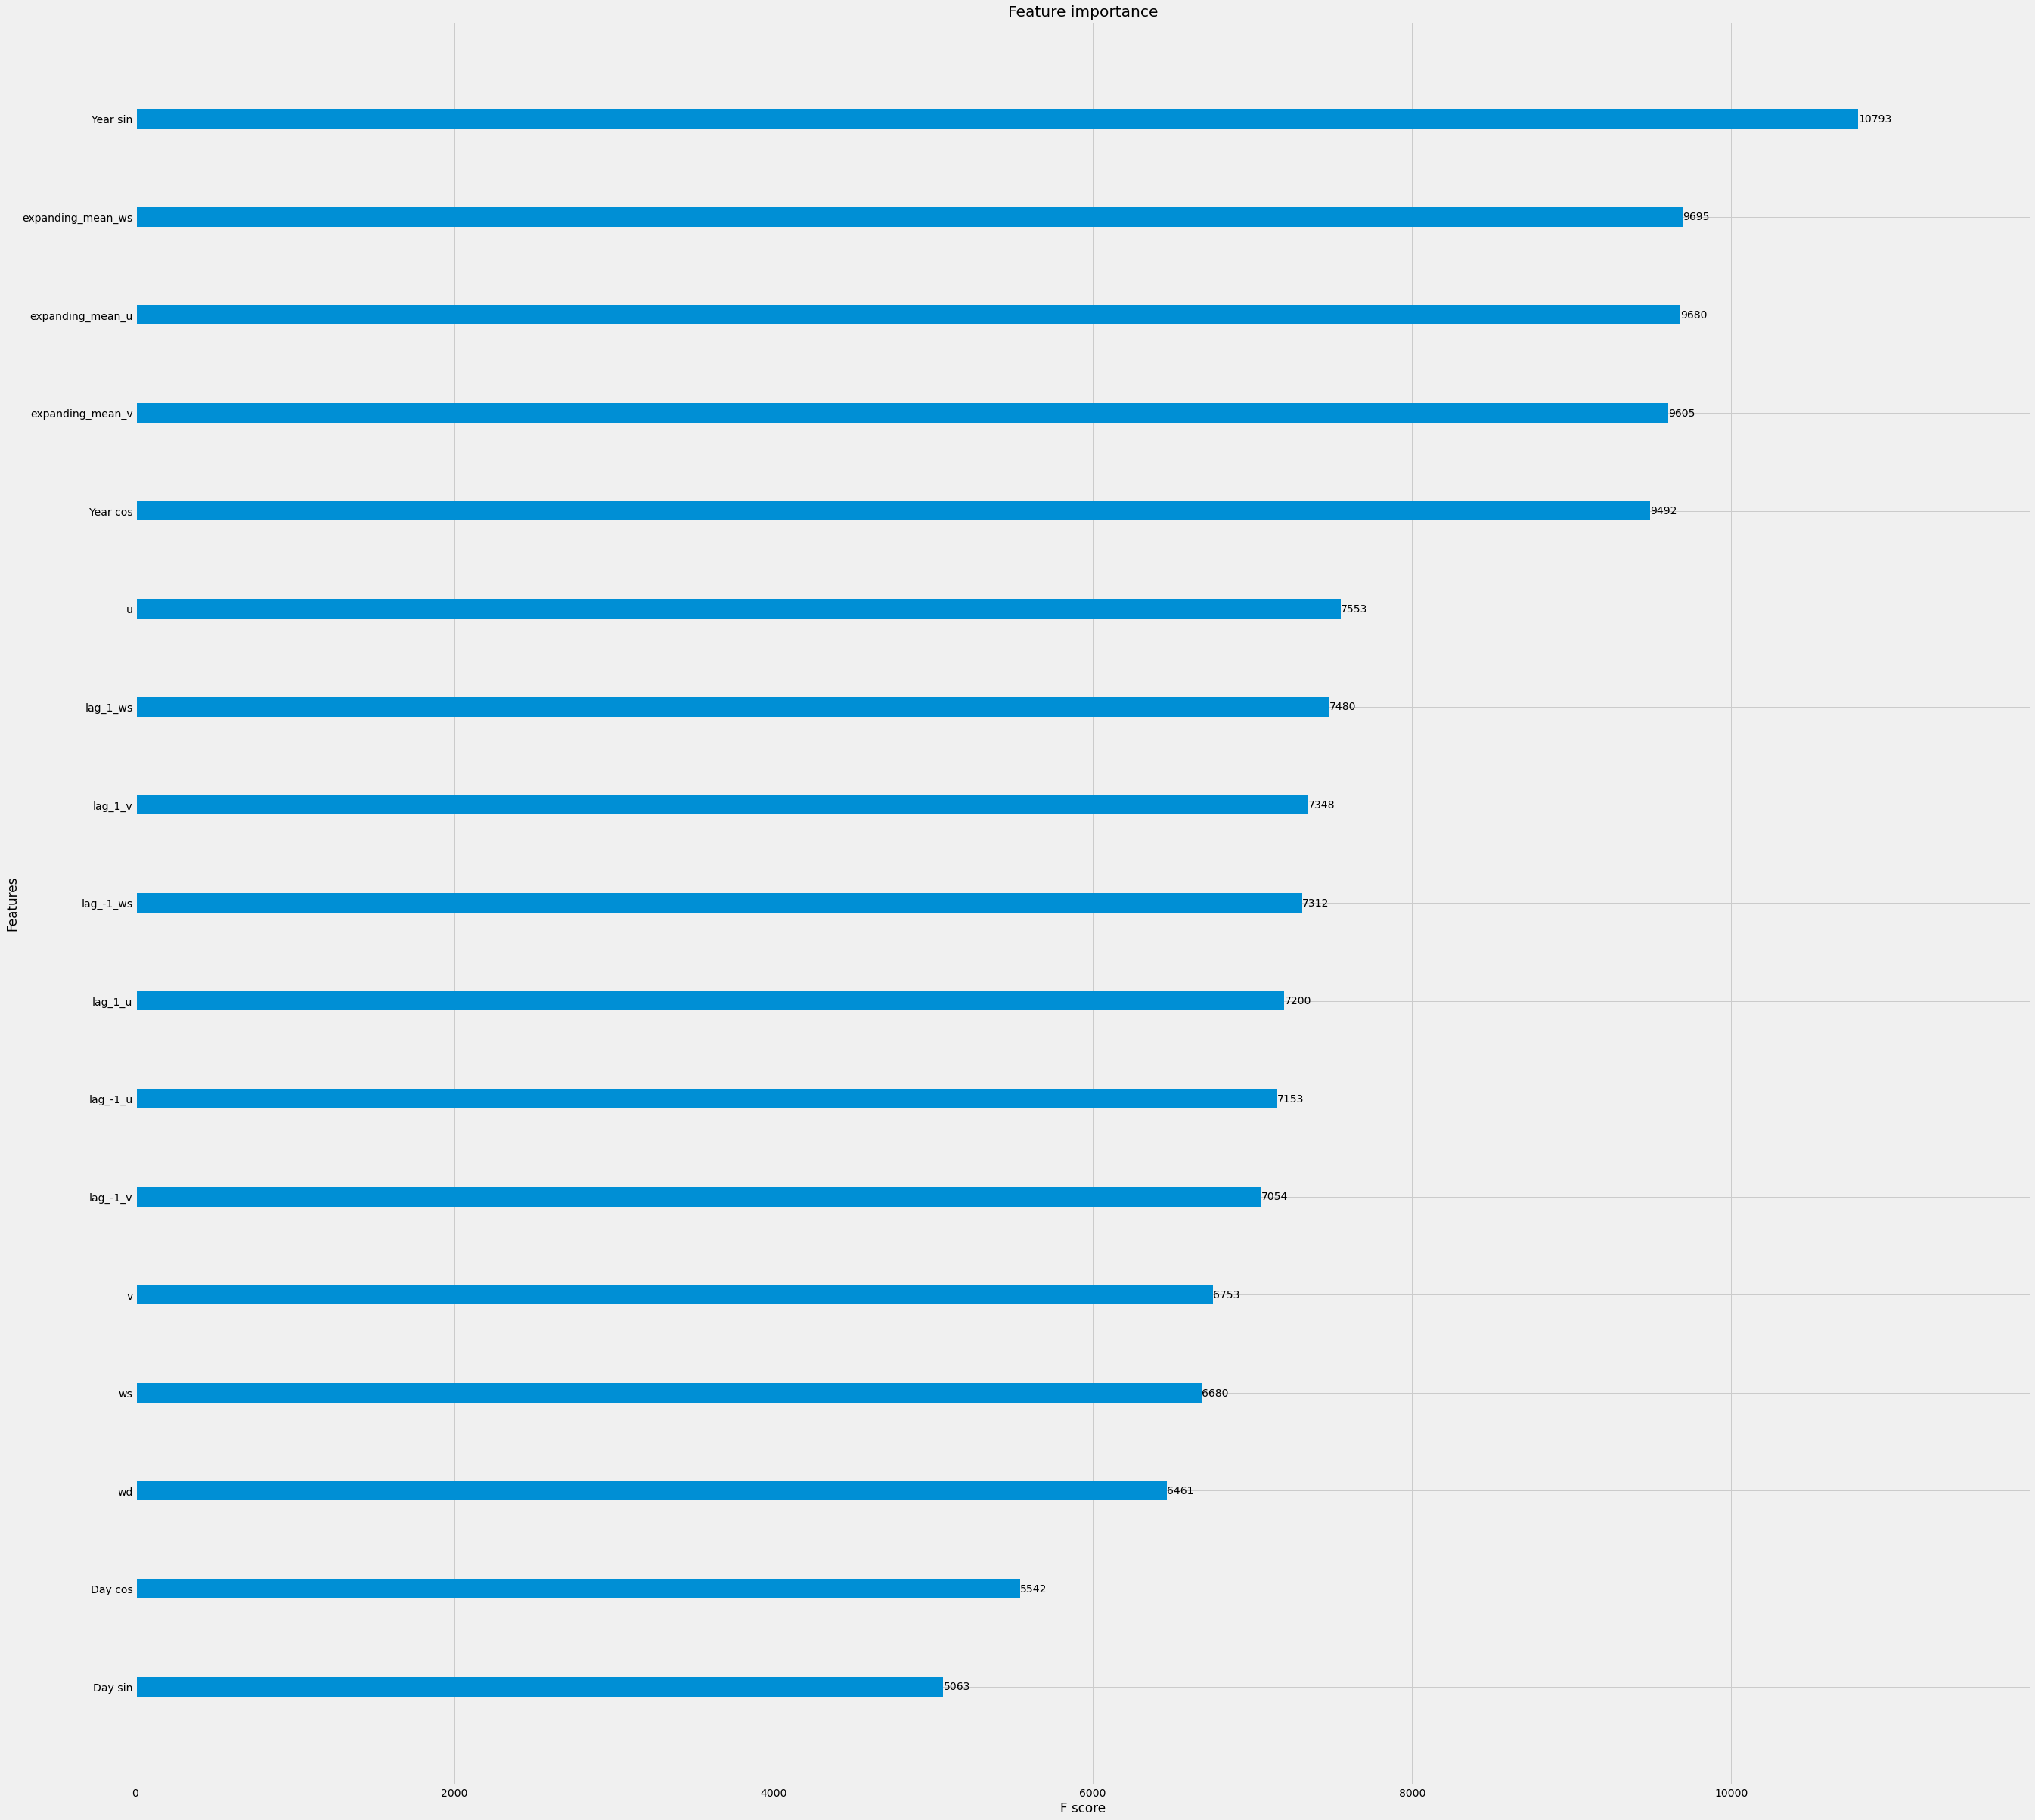

In [135]:
xgb.plot_importance(best_model)
plt.rcParams['figure.figsize'] = [40, 40]
plt.show()

Now our model is fit, we can pass on to the predictions.

_Note: be careful when generating your submission file. Indeed, it needs to be a csv file with ";" as separator._

In [136]:
xgb_model = xgb.XGBRegressor(n_jobs=1).fit(X_train,y_train)
predictions = xgb_model.predict(X_test)
actuals = y_test
print(mean_absolute_error(actuals, predictions))
display(xgb_model.get_xgb_params())

0.07085927081807082


{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 1,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

# FORECAST

In [137]:
X_forecast= xgb.DMatrix(data=X_forecast)
model = best_model

In [138]:
# PREDICTION

df_predictions = pd.DataFrame({
    'date': test['date'],
    'wp1': model.predict(X_forecast),
})

df_predictions.to_csv('predictions.csv', index=False, sep=';')
df_predictions.head()

,date,wp1
date,,
2011-01-01 01:00:00,2011-01-01 01:00:00,0.466211
2011-01-01 02:00:00,2011-01-01 02:00:00,0.399474
2011-01-01 03:00:00,2011-01-01 03:00:00,0.385485
2011-01-01 04:00:00,2011-01-01 04:00:00,0.390132
2011-01-01 05:00:00,2011-01-01 05:00:00,0.385932


In [139]:
# Parameter #score 0,127119.
# {'colsample_bytree': 0.7,
#  'learning_rate': 0.005,
#  'max_depth': 10,
#  'min_child_weight': 6,
#  'objective': 'reg:linear',
#  'eval_metric': 'mae',
#  'subsample': 0.9,
#  'colsample': 1.0,
#  'eta': 0.3}